# 01. Data Cleaning & EDA - Individual Files

## Tujuan Notebook
Membersihkan 8 file Excel secara individual dengan tahapan:
1. **Load Data** - Memuat file dari `data/raw`
2. **EDA (Exploratory Data Analysis)** - Analisis statistik dan visualisasi
3. **Data Preprocessing** - Pembersihan dan pemilihan field sesuai kebutuhan model
4. **Save** - Simpan ke `data/interim`

## Catatan Penting
- **Fokus**: Pembersihan data + pemilihan field
- **Tidak dilakukan**: Binning, encoding, scaling (akan dilakukan setelah merge)
- **Field Selection**: Dipilih berdasarkan kebutuhan 3 model (Clustering, Advice, Pace)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setup Visual Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Paths
RAW_DIR = '../data/raw'
INTERIM_DIR = '../data/interim'
os.makedirs(INTERIM_DIR, exist_ok=True)

print("✅ Environment Ready!")

✅ Environment Ready!


---
# 1. Users Data
**Kebutuhan Model**: Model 2 (Advice) - untuk personalisasi saran

In [3]:
# 1.1 Load Data
file_path = os.path.join(RAW_DIR, 'users.xlsx')
df_users = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_users)} rows, {len(df_users.columns)} columns")

📊 Loaded: 31 rows, 23 columns


In [4]:
# 1.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_users.head(3))
print("\n=== DATA TYPES ===")
display(df_users.dtypes)
print("\n=== MISSING VALUES ===")
missing = df_users.isnull().sum()
display(missing[missing > 0])
print("\n=== BASIC STATISTICS ===")
display(df_users.describe(include='all'))

=== DATA OVERVIEW ===


,id,display_name,name,email,phone,user_role,user_verification_status,created_at,updated_at,deleted_at,...,city_id,custom_city,unsubscribe_link,tz,verified_at,ama,phone_verification_status,phone_verified_with,verified_certificate_name,verified_identity_document
0,96989,igihcksn,Inggih Wicaksono,igihcksn@gmail.com,6.281271e+12,2,1,2017-04-03 19:16:35,2025-04-28 11:54:11,NaN,...,428,NaN,b6b33e749120c67873d2470c6f0abe4627d9573f,Asia/Jakarta,2017-04-03 19:23:52,0,0,sms,Inggih Wicaksono,202007231120540eb16d37ba8ca22d366c570b0fffd4d3
1,938276,nurrizkiadip,Nur Rizki Adi Prasetyo,nrizki@dicoding.com,6.287795e+12,2,1,2020-05-28 20:13:50,2025-10-16 10:06:43,NaN,...,33,NaN,0888bc0f357545b41634c2d0adca935bed2599aa,Asia/Jakarta,2025-10-16 10:03:27,0,0,sms,Nur Rizki Adi Prasetyo,20200720155419385a0bfe7b87200f1542a6e0e5be6d1a
2,5021477,rifath_2SXp,rifath,rifathali088@gmail.com,6.289662e+12,2,1,2025-05-26 14:14:10,2025-10-08 13:17:19,NaN,...,22,NaN,ffb597629e05b0d103b2e1b8e2d1b353bfc924be,Asia/Jakarta,2025-05-26 14:21:58,0,0,NaN,muhammad rifath ali raharjo,NaN



=== DATA TYPES ===


id                                     int64
display_name                          object
name                                  object
email                                 object
phone                                float64
user_role                              int64
user_verification_status               int64
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
deleted_at                           float64
remember_token                        object
image_path                            object
city                                 float64
city_id                                int64
custom_city                          float64
unsubscribe_link                      object
tz                                    object
verified_at                   datetime64[ns]
ama                                    int64
phone_verification_status              int64
phone_verified_with                   object
verified_certificate_name             object
verified_i


=== MISSING VALUES ===


phone                          1
deleted_at                    31
remember_token                 3
city                          31
custom_city                   31
verified_at                    5
phone_verified_with           14
verified_certificate_name      3
verified_identity_document    20
dtype: int64


=== BASIC STATISTICS ===


,id,display_name,name,email,phone,user_role,user_verification_status,created_at,updated_at,deleted_at,...,city_id,custom_city,unsubscribe_link,tz,verified_at,ama,phone_verification_status,phone_verified_with,verified_certificate_name,verified_identity_document
count,3.100000e+01,31,31,31,3.000000e+01,31.0,31.0,31,31,0.0,...,31.000000,0.0,31,31,26,31.0,31.0,17,28,11
unique,NaN,31,31,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31,1,NaN,NaN,NaN,1,28,11
top,NaN,igihcksn,Inggih Wicaksono,igihcksn@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,b6b33e749120c67873d2470c6f0abe4627d9573f,Asia/Jakarta,NaN,NaN,NaN,sms,Inggih Wicaksono,202007231120540eb16d37ba8ca22d366c570b0fffd4d3
freq,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,31,NaN,NaN,NaN,17,1,1
mean,1.657349e+06,NaN,NaN,NaN,7.380182e+12,2.0,1.0,2020-06-24 10:04:59.032258048,2025-09-26 09:27:41.032258560,NaN,...,231.580645,NaN,NaN,NaN,2022-06-15 11:34:56.269230592,0.0,0.0,NaN,NaN,NaN
min,3.390000e+03,NaN,NaN,NaN,6.281669e+10,2.0,1.0,2015-05-15 23:39:01,2024-03-26 16:49:16,NaN,...,10.000000,NaN,NaN,NaN,2017-04-03 19:23:52,0.0,0.0,NaN,NaN,NaN
25%,1.119805e+05,NaN,NaN,NaN,6.282165e+12,2.0,1.0,2017-06-16 00:58:25.500000,2025-10-04 01:48:45.500000,NaN,...,65.000000,NaN,NaN,NaN,2020-05-08 11:57:59.500000,0.0,0.0,NaN,NaN,NaN
50%,7.918820e+05,NaN,NaN,NaN,6.283139e+12,2.0,1.0,2020-04-08 17:03:03,2025-10-27 14:32:47,NaN,...,138.000000,NaN,NaN,NaN,2022-05-09 06:31:08.500000,0.0,0.0,NaN,NaN,NaN
75%,2.265452e+06,NaN,NaN,NaN,6.285588e+12,2.0,1.0,2022-05-28 17:49:06,2025-10-31 14:38:31.500000,NaN,...,392.500000,NaN,NaN,NaN,2024-09-07 05:11:36.249999872,0.0,0.0,NaN,NaN,NaN
max,5.410865e+06,NaN,NaN,NaN,6.289562e+13,2.0,1.0,2025-10-31 09:11:12,2025-11-07 08:05:34,NaN,...,664.000000,NaN,NaN,NaN,2025-10-31 09:08:32,0.0,0.0,NaN,NaN,NaN


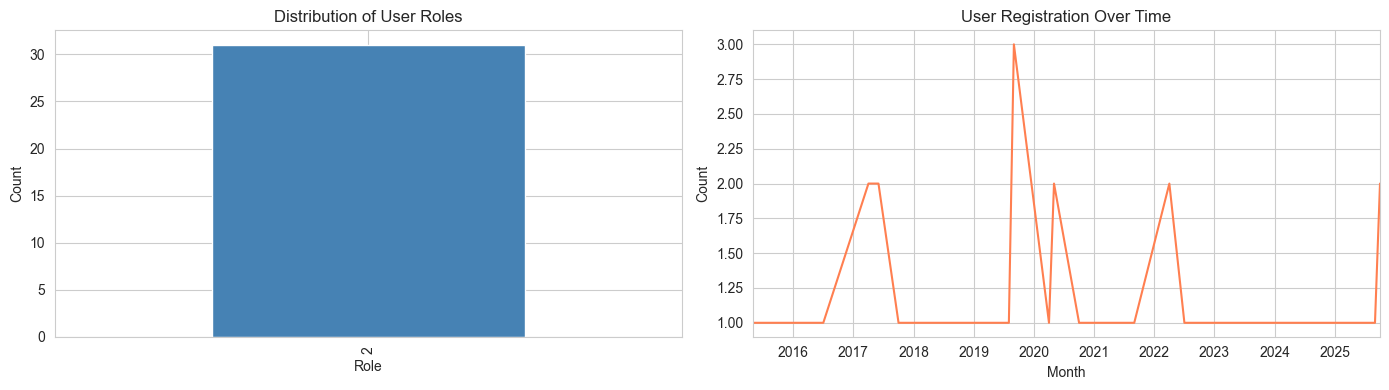

In [4]:
# 1.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# User Roles
if 'user_role' in df_users.columns:
    df_users['user_role'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Distribution of User Roles')
    axes[0].set_xlabel('Role')
    axes[0].set_ylabel('Count')

# Registration Over Time
if 'created_at' in df_users.columns:
    temp = pd.to_datetime(df_users['created_at'], errors='coerce').dropna()
    temp.dt.to_period('M').value_counts().sort_index().plot(ax=axes[1], color='coral')
    axes[1].set_title('User Registration Over Time')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
# 1.4 Preprocessing
print("🔧 PREPROCESSING USERS...")

# Drop PII and unused columns
cols_to_drop = ['email', 'phone', 'password', 'user_verification_status','deleted_at', 'city', 'city_id', 'custom_city', 'remember_token', 'image_path', 
                'unsubscribe_link', 'phone_verification_status', 'phone_verified_with', 
                'verified_certificate_name', 'verified_identity_document', 'ama']
existing_cols_to_drop = [c for c in cols_to_drop if c in df_users.columns]
df_users_clean = df_users.drop(columns=existing_cols_to_drop)
print(f"   Dropped {len(existing_cols_to_drop)} PII/unused columns")

# Convert Dates
date_cols = ['created_at', 'updated_at', 'deleted_at', 'verified_at']
for c in date_cols:
    if c in df_users_clean.columns:
        df_users_clean[c] = pd.to_datetime(df_users_clean[c], errors='coerce')
print(f"   Converted {len([c for c in date_cols if c in df_users_clean.columns])} date columns")

print(f"\n✅ Cleaned shape: {df_users_clean.shape}")
print(f"   Retained columns: {list(df_users_clean.columns)}")

🔧 PREPROCESSING USERS...
   Dropped 15 PII/unused columns
   Converted 3 date columns

✅ Cleaned shape: (31, 8)
   Retained columns: ['id', 'display_name', 'name', 'user_role', 'created_at', 'updated_at', 'tz', 'verified_at']


In [6]:
df_users_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            31 non-null     int64         
 1   display_name  31 non-null     object        
 2   name          31 non-null     object        
 3   user_role     31 non-null     int64         
 4   created_at    31 non-null     datetime64[ns]
 5   updated_at    31 non-null     datetime64[ns]
 6   tz            31 non-null     object        
 7   verified_at   26 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(3)
memory usage: 2.1+ KB


In [7]:
# 1.5 Save
output_path = os.path.join(INTERIM_DIR, 'users_clean.csv')
df_users_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\users_clean.csv


---
# 2. Developer Journey Trackings
**Kebutuhan Model**: Model 1 (Clustering) & Model 3 (Pace) - tracking aktivitas belajar

In [8]:
# 2.1 Load Data
file_path = os.path.join(RAW_DIR, 'developer_journey_trackings.xlsx')
df_trackings = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_trackings)} rows, {len(df_trackings.columns)} columns")

📊 Loaded: 101736 rows, 9 columns


In [9]:
# 2.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_trackings.head(3))
print("\n=== MISSING VALUES ===")
missing = df_trackings.isnull().sum()
display(missing[missing > 0])
print("\n=== UNIQUE COUNTS ===")
print(f"Unique Developers: {df_trackings['developer_id'].nunique()}")
print(f"Unique Journeys: {df_trackings['journey_id'].nunique()}")
print(f"Unique Tutorials: {df_trackings['tutorial_id'].nunique()}")

=== DATA OVERVIEW ===


,id,journey_id,tutorial_id,developer_id,status,last_viewed,first_opened_at,completed_at,developer_journey_status_hash
0,266063,26,599,96989,1,2017-05-26 21:34:02,NaT,NaT,0xA3461ABA
1,362382,26,602,96989,0,2017-05-26 21:35:05,NaT,NaT,0x96D6776A
2,2313738,32,1152,96989,1,2020-04-08 20:59:59,2018-08-29 11:19:41,NaT,0x9926AAB1



=== MISSING VALUES ===


last_viewed           53
first_opened_at    27388
completed_at       21370
dtype: int64


=== UNIQUE COUNTS ===
Unique Developers: 31
Unique Journeys: 181
Unique Tutorials: 9682


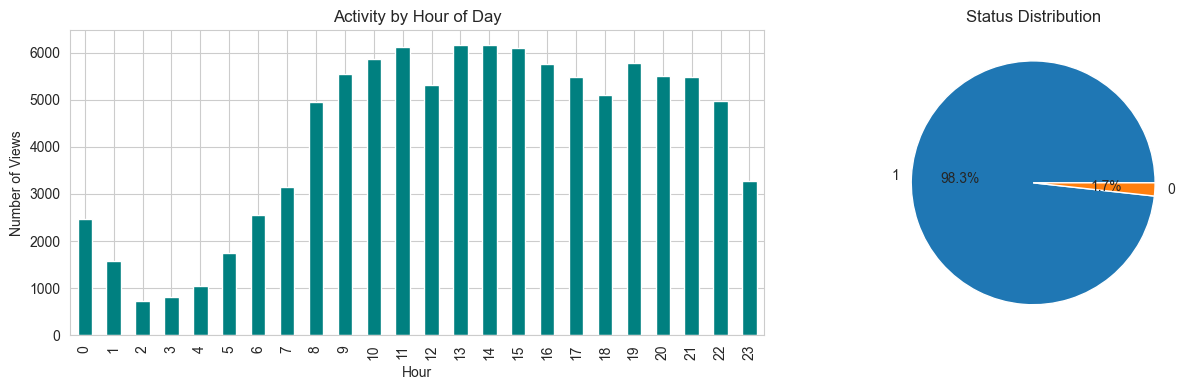

In [10]:
# 2.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Hourly Activity Pattern
if 'last_viewed' in df_trackings.columns:
    temp = pd.to_datetime(df_trackings['last_viewed'], errors='coerce').dropna()
    temp.dt.hour.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='teal')
    axes[0].set_title('Activity by Hour of Day')
    axes[0].set_xlabel('Hour')
    axes[0].set_ylabel('Number of Views')

# Completion Status
if 'status' in df_trackings.columns:
    df_trackings['status'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title('Status Distribution')
    axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [11]:
# 2.4 Preprocessing
print("🔧 PREPROCESSING TRACKINGS...")

# Convert Dates FIRST (before any dropna)
date_cols = ['last_viewed', 'first_opened_at', 'completed_at']
for c in date_cols:
    if c in df_trackings.columns:
        df_trackings[c] = pd.to_datetime(df_trackings[c], errors='coerce')
print(f"   Converted {len(date_cols)} date columns")

# Drop rows with missing critical IDs
before = len(df_trackings)
df_trackings_clean = df_trackings.dropna(subset=['developer_id', 'journey_id'])
print(f"   Dropped {before - len(df_trackings_clean)} rows with missing IDs")

# Remove duplicate tracking records
before = len(df_trackings_clean)
df_trackings_clean = df_trackings_clean.drop_duplicates(subset=['developer_id', 'journey_id', 'tutorial_id'])
print(f"   Removed {before - len(df_trackings_clean)} duplicates")

# 🆕 UPDATE STATUS: If completed_at is null, set status = 0
if 'completed_at' in df_trackings_clean.columns and 'status' in df_trackings_clean.columns:
    before_update = (df_trackings_clean['completed_at'].isnull()).sum()
    df_trackings_clean.loc[df_trackings_clean['completed_at'].isnull(), 'status'] = 0
    print(f"   Updated {before_update} records: completed_at null → status = 0")

# Keep only relevant fields for models
# Model 1 needs: developer_id, journey_id, tutorial_id, last_viewed, first_opened_at, completed_at, status
# Model 3 needs: same fields for pace calculation
required_cols = ['id', 'developer_id', 'journey_id', 'tutorial_id', 'last_viewed', 
                 'first_opened_at', 'completed_at', 'status']
available_cols = [c for c in required_cols if c in df_trackings_clean.columns]
df_trackings_clean = df_trackings_clean[available_cols]

print(f"\n✅ Cleaned shape: {df_trackings_clean.shape}")
print(f"   Retained columns: {list(df_trackings_clean.columns)}")

🔧 PREPROCESSING TRACKINGS...
   Converted 3 date columns
   Dropped 0 rows with missing IDs
   Removed 47 duplicates
   Updated 21362 records: completed_at null → status = 0

✅ Cleaned shape: (101689, 8)
   Retained columns: ['id', 'developer_id', 'journey_id', 'tutorial_id', 'last_viewed', 'first_opened_at', 'completed_at', 'status']


In [13]:
df_trackings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101689 entries, 0 to 101735
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               101689 non-null  int64         
 1   developer_id     101689 non-null  int64         
 2   journey_id       101689 non-null  int64         
 3   tutorial_id      101689 non-null  int64         
 4   last_viewed      101654 non-null  datetime64[ns]
 5   first_opened_at  74335 non-null   datetime64[ns]
 6   completed_at     80327 non-null   datetime64[ns]
 7   status           101689 non-null  int64         
dtypes: datetime64[ns](3), int64(5)
memory usage: 7.0 MB


In [12]:
# 2.5 Save
output_path = os.path.join(INTERIM_DIR, 'trackings_clean.csv')
df_trackings_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\trackings_clean.csv


---
# 3. Developer Journey Submissions
**Kebutuhan Model**: Model 1 (Clustering) - untuk identifikasi submission struggler

In [14]:
# 3.1 Load Data
file_path = os.path.join(RAW_DIR, 'developer_journey_submissions.xlsx')
df_subs = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_subs)} rows, {len(df_subs.columns)} columns")

📊 Loaded: 2262 rows, 21 columns


In [15]:
# 3.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_subs.head(3))
print("\n=== MISSING VALUES ===")
missing = df_subs.isnull().sum()
display(missing[missing > 0])
print("\n=== STATUS DISTRIBUTION ===")
if 'status' in df_subs.columns:
    display(df_subs['status'].value_counts())
print("\n=== RATING STATISTICS ===")
if 'rating' in df_subs.columns:
    display(df_subs['rating'].describe())

=== DATA OVERVIEW ===


,id,journey_id,quiz_id,submitter_id,version_id,app_link,app_comment,status,as_trial_subscriber,created_at,...,admin_comment,reviewer_id,current_reviewer,started_review_at,ended_review_at,rating,note,first_opened_at,submission_duration,pass_auto_checker
0,94634,14,258,3390,6683.0,https://dicodingacademy.blob.core.windows.net/...,"<p>Belajar, praktek dan belajar....materi yang...",1,0,2018-05-30 14:54:33,...,<p><strong>Checklist</strong></p><ol><li>Halam...,18176.0,NaN,2018-05-31 05:33:02,2018-05-31 05:45:44,4,NaN,NaN,0,NaN
1,95480,14,332,3390,6686.0,https://dicodingacademy.blob.core.windows.net/...,NaN,-1,0,2018-06-12 10:05:10,...,<p><strong>Rejection message</strong></p><ol><...,18176.0,NaN,2018-06-12 10:36:57,2018-06-12 11:10:29,0,NaN,NaN,0,NaN
2,95579,14,332,3390,6686.0,https://dicodingacademy.blob.core.windows.net/...,<p>learn...learn</p>,-1,0,2018-06-14 10:42:20,...,<p><strong>Rejection message</strong></p><ol><...,18176.0,NaN,2018-06-14 12:23:06,2018-06-14 12:43:53,0,NaN,NaN,0,NaN



=== MISSING VALUES ===


version_id            514
app_comment          1144
admin_comment         131
reviewer_id           114
current_reviewer     2261
started_review_at     101
ended_review_at       114
note                 1923
first_opened_at      2262
pass_auto_checker    2262
dtype: int64


=== STATUS DISTRIBUTION ===


status
-1    1128
 1    1020
-2     114
Name: count, dtype: int64


=== RATING STATISTICS ===


count    2262.000000
mean        1.880195
std         2.172211
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

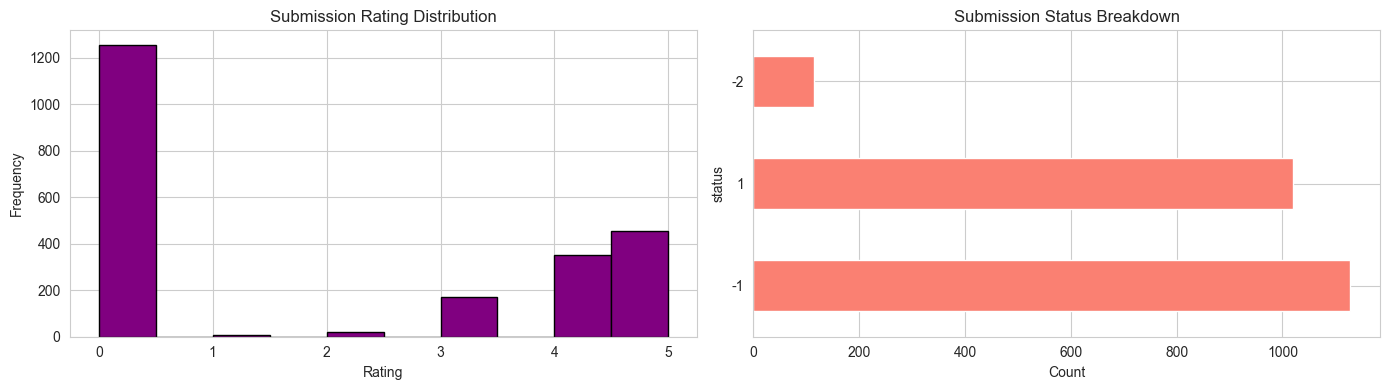

In [17]:
# 3.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Rating Distribution
if 'rating' in df_subs.columns:
    df_subs['rating'].dropna().hist(bins=10, ax=axes[0], color='purple', edgecolor='black')
    axes[0].set_title('Submission Rating Distribution')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Frequency')

# Status Counts
if 'status' in df_subs.columns:
    df_subs['status'].value_counts().plot(kind='barh', ax=axes[1], color='salmon')
    axes[1].set_title('Submission Status Breakdown')
    axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

In [20]:
# 3.4 Preprocessing
print("🔧 PREPROCESSING SUBMISSIONS...")

# Convert Dates
date_cols = ['created_at', 'updated_at', 'started_review_at', 'ended_review_at', 'first_opened_at']
for c in date_cols:
    if c in df_subs.columns:
        df_subs[c] = pd.to_datetime(df_subs[c], errors='coerce')
print(f"   Converted {len([c for c in date_cols if c in df_subs.columns])} date columns")

# Drop text-heavy unused columns
cols_drop = ['app_link', 'app_comment', 'admin_comment', 'note']
existing_cols_to_drop = [c for c in cols_drop if c in df_subs.columns]
df_subs_clean = df_subs.drop(columns=existing_cols_to_drop)
print(f"   Dropped {len(existing_cols_to_drop)} text-heavy columns")

# Keep only fields needed for Model 1 (Clustering)
# Need: submitter_id, journey_id, rating, status, submission_duration, created_at
required_cols = ['id', 'submitter_id', 'journey_id', 'quiz_id', 'rating', 'status', 
                 'submission_duration', 'created_at']
available_cols = [c for c in required_cols if c in df_subs_clean.columns]
df_subs_clean = df_subs_clean[available_cols]

print(f"\n✅ Cleaned shape: {df_subs_clean.shape}")
print(f"   Retained columns: {list(df_subs_clean.columns)}")

🔧 PREPROCESSING SUBMISSIONS...
   Converted 5 date columns
   Dropped 4 text-heavy columns

✅ Cleaned shape: (2262, 8)
   Retained columns: ['id', 'submitter_id', 'journey_id', 'quiz_id', 'rating', 'status', 'submission_duration', 'created_at']


In [21]:
df_subs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2262 non-null   int64         
 1   submitter_id         2262 non-null   int64         
 2   journey_id           2262 non-null   int64         
 3   quiz_id              2262 non-null   int64         
 4   rating               2262 non-null   int64         
 5   status               2262 non-null   int64         
 6   submission_duration  2262 non-null   int64         
 7   created_at           2262 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 141.5 KB


In [23]:
# 3.5 Save
output_path = os.path.join(INTERIM_DIR, 'submissions_clean.csv')
df_subs_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\submissions_clean.csv


---
# 4. Exam Results
**Kebutuhan Model**: Model 1 (Clustering) - untuk identifikasi quiz struggler

In [24]:
# 4.1 Load Data
file_path = os.path.join(RAW_DIR, 'exam_results.xlsx')
df_exam_res = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_exam_res)} rows, {len(df_exam_res.columns)} columns")

📊 Loaded: 17438 rows, 7 columns


In [25]:
# 4.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_exam_res.head(3))
print("\n=== MISSING VALUES ===")
missing = df_exam_res.isnull().sum()
display(missing[missing > 0])
print("\n=== SCORE STATISTICS ===")
df_exam_res['score'] = pd.to_numeric(df_exam_res['score'], errors='coerce')
display(df_exam_res['score'].describe())
print("\n=== PASS RATE ===")
if 'is_passed' in df_exam_res.columns:
    pass_rate = df_exam_res['is_passed'].value_counts(normalize=True) * 100
    print(f"Pass: {pass_rate.get(1, 0):.1f}%")
    print(f"Fail: {pass_rate.get(0, 0):.1f}%")

=== DATA OVERVIEW ===


,id,exam_registration_id,total_questions,score,is_passed,created_at,look_report_at
0,42762,42482,25,68,0,2020-04-14 08:57:50,2020-04-19 19:12:25
1,45652,45362,25,68,0,2020-04-14 23:36:31,2020-04-19 19:12:13
2,61017,60627,25,80,1,2020-04-19 19:32:53,2020-04-19 19:32:55



=== MISSING VALUES ===


look_report_at    12609
dtype: int64


=== SCORE STATISTICS ===


count    17438.000000
mean        77.348664
std         26.759874
min          0.000000
25%         60.000000
50%         81.000000
75%        100.000000
max        100.000000
Name: score, dtype: float64


=== PASS RATE ===
Pass: 71.0%
Fail: 29.0%


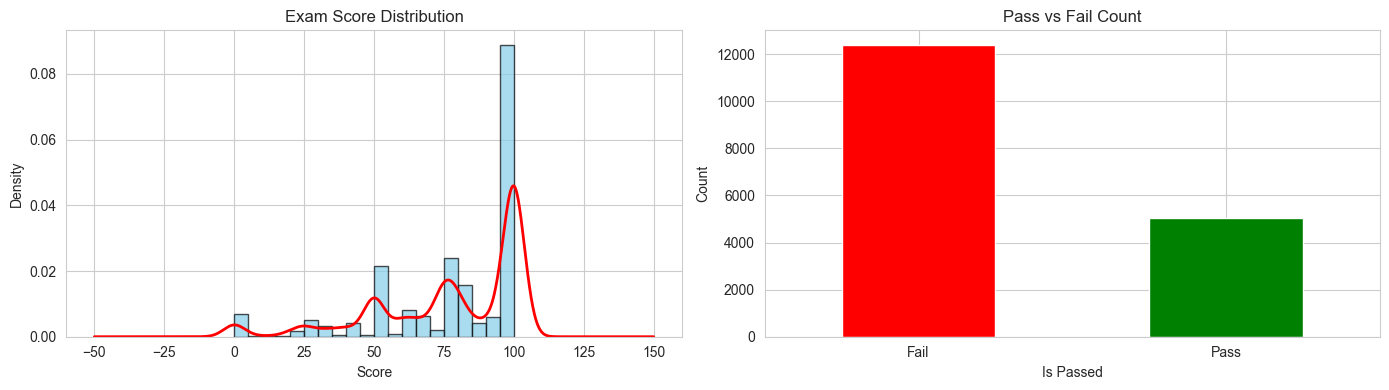

In [26]:
# 4.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Score Distribution with KDE
df_exam_res['score'].dropna().hist(bins=20, ax=axes[0], color='skyblue', edgecolor='black', density=True, alpha=0.7)
df_exam_res['score'].dropna().plot(kind='kde', ax=axes[0], color='red', linewidth=2)
axes[0].set_title('Exam Score Distribution')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Density')

# Pass vs Fail
if 'is_passed' in df_exam_res.columns:
    df_exam_res['is_passed'].value_counts().plot(kind='bar', ax=axes[1], color=['red', 'green'])
    axes[1].set_title('Pass vs Fail Count')
    axes[1].set_xlabel('Is Passed')
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(['Fail', 'Pass'], rotation=0)

plt.tight_layout()
plt.show()

In [28]:
# 4.4 Preprocessing
print("🔧 PREPROCESSING EXAM RESULTS...")

# Ensure score is numeric
df_exam_res['score'] = pd.to_numeric(df_exam_res['score'], errors='coerce')
print("   Converted score to numeric")

# Convert Dates
date_cols = ['created_at']
for c in date_cols:
    if c in df_exam_res.columns:
        df_exam_res[c] = pd.to_datetime(df_exam_res[c], errors='coerce')
print(f"   Converted {len(date_cols)} date columns")

# Keep all columns as needed for Model 1
df_exam_res_clean = df_exam_res.copy()
cols_to_drop = ['look_report_at']
df_exam_res_clean = df_exam_res_clean.drop(
    columns=[c for c in cols_to_drop if c in df_exam_res_clean.columns]
)
print(f"   Dropped columns: {[c for c in cols_to_drop if c in df_exam_res.columns]}")

print(f"\n✅ Cleaned shape: {df_exam_res_clean.shape}")
print(f"   Retained columns: {list(df_exam_res_clean.columns)}")

🔧 PREPROCESSING EXAM RESULTS...
   Converted score to numeric
   Converted 1 date columns
   Dropped columns: ['look_report_at']

✅ Cleaned shape: (17438, 6)
   Retained columns: ['id', 'exam_registration_id', 'total_questions', 'score', 'is_passed', 'created_at']


In [29]:
df_exam_res_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    17438 non-null  int64         
 1   exam_registration_id  17438 non-null  int64         
 2   total_questions       17438 non-null  int64         
 3   score                 17438 non-null  int64         
 4   is_passed             17438 non-null  int64         
 5   created_at            17438 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 817.5 KB


In [30]:
# 4.5 Save
output_path = os.path.join(INTERIM_DIR, 'exam_results_clean.csv')
df_exam_res_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\exam_results_clean.csv


---
# 5. Developer Journey Completions
**Kebutuhan Model**: Model 1 (Clustering) & Model 3 (Pace) - untuk mengukur completion speed

In [31]:
# 5.1 Load Data
file_path = os.path.join(RAW_DIR, 'developer_journey_completions.xlsx')
df_comps = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_comps)} rows, {len(df_comps.columns)} columns")

📊 Loaded: 1032 rows, 10 columns


In [32]:
# 5.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_comps.head(3))
print("\n=== MISSING VALUES ===")
missing = df_comps.isnull().sum()
display(missing[missing > 0])
print("\n=== STUDY DURATION STATISTICS ===")
if 'study_duration' in df_comps.columns:
    display(df_comps['study_duration'].describe())
print("\n=== AVG SUBMISSION RATING ===")
if 'avg_submission_rating' in df_comps.columns:
    display(df_comps['avg_submission_rating'].describe())

=== DATA OVERVIEW ===


,id,user_id,journey_id,created_at,updated_at,enrolling_times,enrollments_at,last_enrolled_at,study_duration,avg_submission_rating
0,104582,96989,32,2020-04-11 14:39:11,2020-04-11 14:39:11,3,"2018-08-29 11:19:45,2019-02-05 09:20:57,2020-0...",2020-02-26 17:05:28,44,4.50
1,30951,96989,51,2019-08-10 02:42:35,2019-08-10 02:42:35,1,2019-06-20 21:01:59,2019-06-20 21:01:59,50,3.00
2,74313,96989,74,2019-12-23 06:22:02,2019-12-23 06:22:02,2,"2019-10-29 09:34:40,2019-10-31 09:38:30",2019-10-31 09:38:30,52,2.67



=== MISSING VALUES ===


avg_submission_rating    558
dtype: int64


=== STUDY DURATION STATISTICS ===


count    1032.000000
mean       72.106589
std       176.575222
min         0.000000
25%         3.000000
50%        16.000000
75%        58.000000
max      1970.000000
Name: study_duration, dtype: float64


=== AVG SUBMISSION RATING ===


count    474.000000
mean       4.213819
std        0.893378
min        0.000000
25%        4.000000
50%        4.400000
75%        5.000000
max        5.000000
Name: avg_submission_rating, dtype: float64

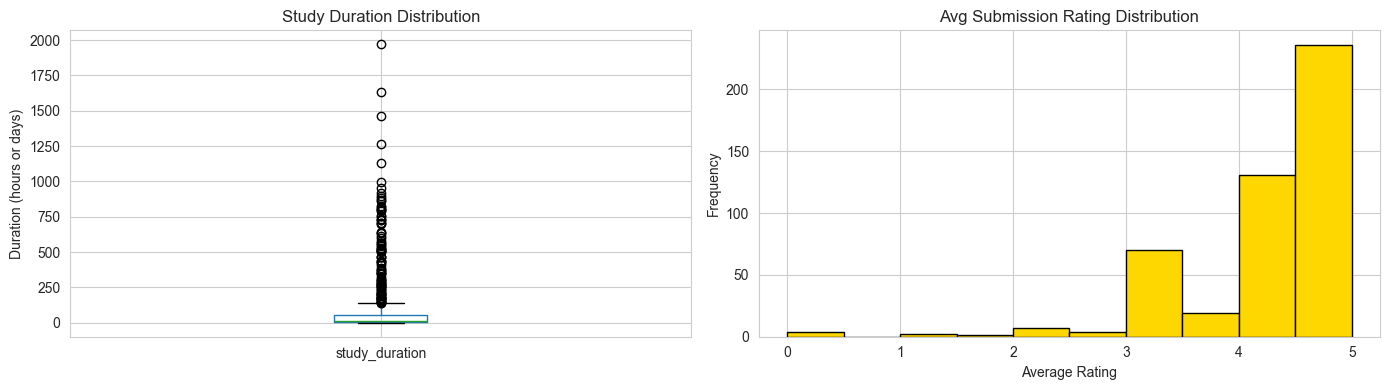

In [34]:
# 5.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Study Duration Boxplot
if 'study_duration' in df_comps.columns:
    df_comps.boxplot(column='study_duration', ax=axes[0])
    axes[0].set_title('Study Duration Distribution')
    axes[0].set_ylabel('Duration (hours or days)')

# Avg Submission Rating
if 'avg_submission_rating' in df_comps.columns:
    df_comps['avg_submission_rating'].dropna().hist(bins=10, ax=axes[1], color='gold', edgecolor='black')
    axes[1].set_title('Avg Submission Rating Distribution')
    axes[1].set_xlabel('Average Rating')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# 5.4 Preprocessing
print("🔧 PREPROCESSING COMPLETIONS...")

# Convert Dates
date_cols = ['created_at', 'updated_at', 'last_enrolled_at']
for c in date_cols:
    if c in df_comps.columns:
        df_comps[c] = pd.to_datetime(df_comps[c], errors='coerce')
print(f"   Converted {len(date_cols)} date columns")

# No columns to drop - all are useful
df_comps_clean = df_comps.copy()

# Feature 1: repeat_enrollments (total - 1)
if 'enrollments_at' in df_comps_clean.columns:
    df_comps_clean['repeat_enrollments'] = df_comps_clean['enrollments_at'].apply(
        lambda x: max(0, len(str(x).split(',')) - 1) if pd.notna(x) and str(x).strip() else 0
    )
    print(f"   ✓ Created repeat_enrollments | Distribution: {df_comps_clean['repeat_enrollments'].value_counts().sort_index().head().to_dict()}")

# Feature 2: avg_submission_rating - parse or generate
if 'avg_submission_rating' in df_comps_clean.columns:
    missing = df_comps_clean['avg_submission_rating'].isnull().sum()
    
    # Parse comma-separated ratings or generate dummy
    def process_rating(row):
        rating = row['avg_submission_rating']
        # If exists, parse it
        if pd.notna(rating):
            try:
                if ',' in str(rating):
                    return np.mean([float(r.strip()) for r in str(rating).split(',')])
                return float(rating)
            except:
                pass
        # Generate dummy based on enrolling_times
        times = int(row.get('enrolling_times', 1)) if pd.notna(row.get('enrolling_times')) else 1
        np.random.seed(int(row.name) % 10000)
        ratings = np.random.choice([1.0, 2.0, 3.0, 4.0, 5.0], size=times, p=[0.05, 0.15, 0.30, 0.30, 0.20])
        return round(np.mean(ratings), 1)
    
    df_comps_clean['avg_submission_rating'] = df_comps_clean.apply(process_rating, axis=1)
    print(f"   ✓ Processed avg_submission_rating | Filled {missing} missing | Mean: {df_comps_clean['avg_submission_rating'].mean():.2f}")

print(f"\n✅ Cleaned shape: {df_comps_clean.shape}")
print(f"   Retained columns: {list(df_comps_clean.columns)}")

🔧 PREPROCESSING COMPLETIONS...
   Converted 3 date columns
   ✓ Created repeat_enrollments | Distribution: {0: 857, 1: 128, 2: 30, 3: 13, 4: 2}
   ✓ Processed avg_submission_rating | Filled 558 missing | Mean: 3.77

✅ Cleaned shape: (1032, 11)
   Retained columns: ['id', 'user_id', 'journey_id', 'created_at', 'updated_at', 'enrolling_times', 'enrollments_at', 'last_enrolled_at', 'study_duration', 'avg_submission_rating', 'repeat_enrollments']


In [42]:
df_comps_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1032 non-null   int64         
 1   user_id                1032 non-null   int64         
 2   journey_id             1032 non-null   int64         
 3   created_at             1032 non-null   datetime64[ns]
 4   updated_at             1032 non-null   datetime64[ns]
 5   enrolling_times        1032 non-null   int64         
 6   enrollments_at         1032 non-null   object        
 7   last_enrolled_at       1032 non-null   datetime64[ns]
 8   study_duration         1032 non-null   int64         
 9   avg_submission_rating  1032 non-null   float64       
 10  repeat_enrollments     1032 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(6), object(1)
memory usage: 88.8+ KB


In [43]:
# 5.5 Save
output_path = os.path.join(INTERIM_DIR, 'completions_clean.csv')
df_comps_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\completions_clean.csv


---
# 6. Developer Journeys (Reference Data)
**Kebutuhan Model**: Model 3 (Pace) - untuk normalisasi dengan `hours_to_study`

In [44]:
# 6.1 Load Data
file_path = os.path.join(RAW_DIR, 'developer_journeys.xlsx')
df_journeys = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_journeys)} rows, {len(df_journeys.columns)} columns")

📊 Loaded: 176 rows, 33 columns


In [45]:
# 6.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_journeys.head(3))
print("\n=== DATA TYPES ===")
display(df_journeys.dtypes)
print("\n=== MISSING VALUES ===")
missing = df_journeys.isnull().sum()
display(missing[missing > 0])
print("\n=== DIFFICULTY DISTRIBUTION ===")
if 'difficulty' in df_journeys.columns:
    display(df_journeys['difficulty'].value_counts())
print("\n=== HOURS TO STUDY STATS ===")
if 'hours_to_study' in df_journeys.columns:
    display(df_journeys['hours_to_study'].describe())

=== DATA OVERVIEW ===


,id,name,summary,point,required_point,xp,required_xp,difficulty,image_path,status,...,discount,discount_ends_at,media_cover,installment_plan_id,graduation,position,hours_to_study,video_subtitle,partner_logo,teaching_methods
0,14,Belajar Fundamental Aplikasi Android,Pelajari skill Android dengan kurikulum terlen...,0,4249,2200,0,2,belajar_fundamental_aplikasi_android_image_171...,1,...,0,2018-04-18 23:59:00,belajar_fundamental_aplikasi_android_mc_230421...,24.0,1,73.0,140,NaN,dos:belajar_fundamental_aplikasi_android_partn...,"<h6 class=""text-gray-700 font-weight-500"" styl..."
1,51,Belajar Membuat Aplikasi Android untuk Pemula,Buat aplikasi pertamamu pada Android Studio de...,0,679,400,0,1,belajar_membuat_aplikasi_android_untuk_pemula_...,1,...,0,2017-09-06 00:00:00,belajar_membuat_aplikasi_android_untuk_pemula_...,NaN,1,70.0,60,NaN,dos:belajar_membuat_aplikasi_android_untuk_pem...,"<h6 class=""text-gray-700 font-weight-500"" styl..."
2,80,Memulai Pemrograman dengan Kotlin,"Pelajari dasar bahasa pemrograman, functional ...",0,879,400,0,0,memulai_pemrograman_dengan_kotlin_image_171120...,1,...,0,NaT,memulai_pemrograman_dengan_kotlin_mc_230421143...,NaN,1,67.0,50,NaN,dos:memulai_pemrograman_dengan_kotlin_partner_...,"<h6 class=""text-gray-700 font-weight-500"" styl..."



=== DATA TYPES ===


id                              int64
name                           object
summary                        object
point                           int64
required_point                  int64
xp                              int64
required_xp                     int64
difficulty                      int64
image_path                     object
status                          int64
listed                          int64
created_at             datetime64[ns]
updated_at             datetime64[ns]
description                    object
logo_path                      object
banner_path                   float64
platform_id                     int64
instructor_id                   int64
reviewer_id                   float64
deadline                        int64
trial_deadline                  int64
reviewer_incentive              int64
type                            int64
discount                        int64
discount_ends_at       datetime64[ns]
media_cover                    object
installment_


=== MISSING VALUES ===


logo_path                2
banner_path            176
reviewer_id            168
discount_ends_at       167
media_cover             37
installment_plan_id    167
position                57
video_subtitle         176
partner_logo           143
teaching_methods        78
dtype: int64


=== DIFFICULTY DISTRIBUTION ===


difficulty
0    152
1     14
2      9
3      1
Name: count, dtype: int64


=== HOURS TO STUDY STATS ===


count    176.000000
mean      30.011364
std       31.853771
min        0.000000
25%        2.000000
50%       19.000000
75%       45.000000
max      150.000000
Name: hours_to_study, dtype: float64

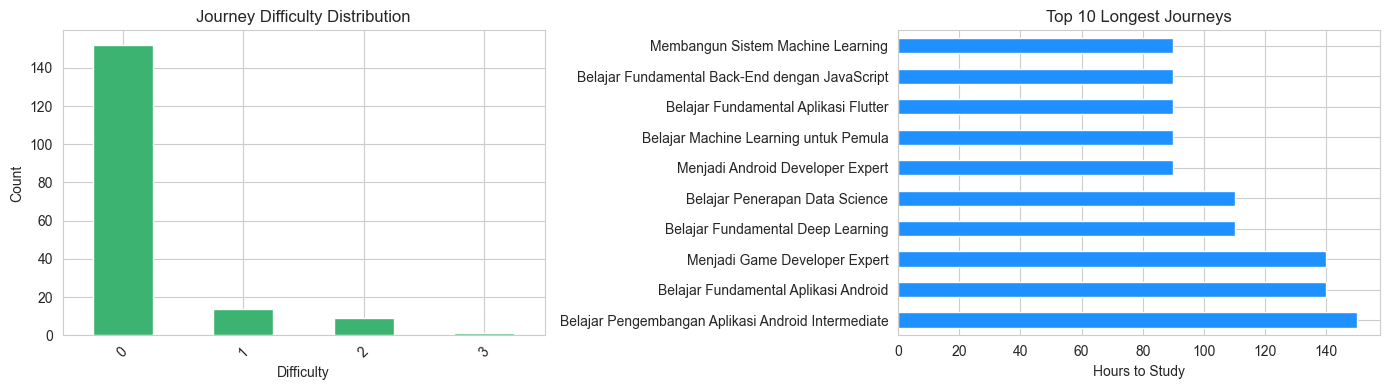

In [46]:
# 6.3 EDA - Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Difficulty Levels
if 'difficulty' in df_journeys.columns:
    df_journeys['difficulty'].value_counts().plot(kind='bar', ax=axes[0], color='mediumseagreen')
    axes[0].set_title('Journey Difficulty Distribution')
    axes[0].set_xlabel('Difficulty')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Top 10 Longest Journeys
if 'hours_to_study' in df_journeys.columns and 'name' in df_journeys.columns:
    top10 = df_journeys.nlargest(10, 'hours_to_study')[['name', 'hours_to_study']]
    top10.plot(x='name', y='hours_to_study', kind='barh', ax=axes[1], color='dodgerblue', legend=False)
    axes[1].set_title('Top 10 Longest Journeys')
    axes[1].set_xlabel('Hours to Study')
    axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [47]:
# 6.4 Preprocessing
print("🔧 PREPROCESSING JOURNEYS...")

# Convert Dates
date_cols = ['created_at', 'updated_at', 'deadline', 'trial_deadline', 'discount_ends_at']
for c in date_cols:
    if c in df_journeys.columns:
        df_journeys[c] = pd.to_datetime(df_journeys[c], errors='coerce')
print(f"   Converted {len([c for c in date_cols if c in df_journeys.columns])} date columns")

# Keep only relevant fields for Model 3 (Pace)
# Need: id, name, difficulty, hours_to_study
required_cols = ['id', 'name', 'difficulty', 'hours_to_study', 'point', 'xp', 'created_at']
available_cols = [c for c in required_cols if c in df_journeys.columns]
df_journeys_clean = df_journeys[available_cols]

print(f"\n✅ Cleaned shape: {df_journeys_clean.shape}")
print(f"   Retained columns: {list(df_journeys_clean.columns)}")

🔧 PREPROCESSING JOURNEYS...
   Converted 5 date columns

✅ Cleaned shape: (176, 7)
   Retained columns: ['id', 'name', 'difficulty', 'hours_to_study', 'point', 'xp', 'created_at']


In [48]:
df_journeys_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              176 non-null    int64         
 1   name            176 non-null    object        
 2   difficulty      176 non-null    int64         
 3   hours_to_study  176 non-null    int64         
 4   point           176 non-null    int64         
 5   xp              176 non-null    int64         
 6   created_at      176 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.8+ KB


In [49]:
# 6.5 Save
output_path = os.path.join(INTERIM_DIR, 'journeys_clean.csv')
df_journeys_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\journeys_clean.csv


---
# 7. Developer Journey Tutorials
**Kebutuhan Model**: Model 2 (Advice) - untuk identifikasi stuck point

In [50]:
# 7.1 Load Data
file_path = os.path.join(RAW_DIR, 'developer_journey_tutorials.xlsx')
df_tutorials = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_tutorials)} rows, {len(df_tutorials.columns)} columns")

📊 Loaded: 9682 rows, 14 columns


In [51]:
# 7.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_tutorials.head(3))
print("\n=== MISSING VALUES ===")
missing = df_tutorials.isnull().sum()
display(missing[missing > 0])
print("\n=== TUTORIAL TYPES ===")
if 'type' in df_tutorials.columns:
    display(df_tutorials['type'].value_counts())

=== DATA OVERVIEW ===


,id,developer_journey_id,title,type,content,requirements,submit_only_requirements,position,status,created_at,updated_at,trial,author_id,is_main_module
0,1,2,Modul 1 : Activity,quiz,"<h4 style=""font-family: &quot;Fira Sans&quot;,...",NaN,NaN,1,1,2015-07-30 09:13:09,2016-10-27 13:55:20,0,NaN,0
1,2,2,Modul 2 : Intent,quiz,"<p style=""font-family: &quot;Fira Sans&quot;, ...",1,NaN,2,1,2015-07-30 10:09:45,2016-10-27 13:56:18,0,NaN,0
2,3,2,Modul 3 : Fragment,quiz,<h4>Pendahuluan</h4><p>Modul ini dibuat untuk ...,"1,2",NaN,3,1,2015-07-30 10:21:05,2016-10-27 13:56:31,0,NaN,0



=== MISSING VALUES ===


requirements                 859
submit_only_requirements    9645
author_id                   1980
dtype: int64


=== TUTORIAL TYPES ===


type
article             8163
exam                 990
quiz                 190
multiple             131
interactivevideo     130
interactivecode       78
Name: count, dtype: int64

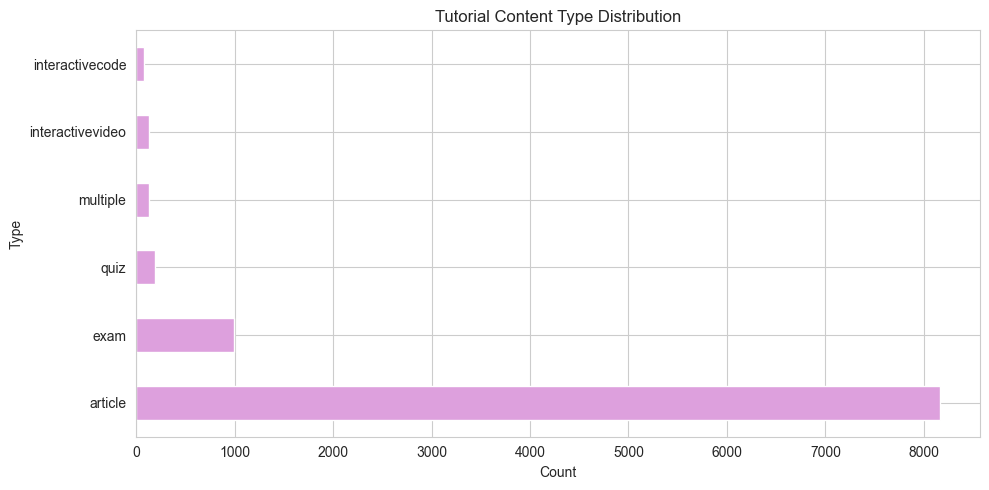

In [47]:
# 7.3 EDA - Visualizations
if 'type' in df_tutorials.columns:
    plt.figure(figsize=(10, 5))
    df_tutorials['type'].value_counts().plot(kind='barh', color='plum')
    plt.title('Tutorial Content Type Distribution')
    plt.xlabel('Count')
    plt.ylabel('Type')
    plt.tight_layout()
    plt.show()

In [52]:
# 7.4 Preprocessing
print("🔧 PREPROCESSING TUTORIALS...")

# Convert Dates
date_cols = ['created_at', 'updated_at']
for c in date_cols:
    if c in df_tutorials.columns:
        df_tutorials[c] = pd.to_datetime(df_tutorials[c], errors='coerce')
print(f"   Converted {len(date_cols)} date columns")

# Keep relevant fields for Model 2
# Need: id, developer_journey_id, title, type, position
required_cols = ['id', 'developer_journey_id', 'title', 'type', 'position', 'status']
available_cols = [c for c in required_cols if c in df_tutorials.columns]
df_tutorials_clean = df_tutorials[available_cols]

print(f"\n✅ Cleaned shape: {df_tutorials_clean.shape}")
print(f"   Retained columns: {list(df_tutorials_clean.columns)}")

🔧 PREPROCESSING TUTORIALS...
   Converted 2 date columns

✅ Cleaned shape: (9682, 6)
   Retained columns: ['id', 'developer_journey_id', 'title', 'type', 'position', 'status']


In [53]:
df_tutorials_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9682 non-null   int64 
 1   developer_journey_id  9682 non-null   int64 
 2   title                 9682 non-null   object
 3   type                  9682 non-null   object
 4   position              9682 non-null   int64 
 5   status                9682 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 454.0+ KB


In [54]:
# 7.5 Save
output_path = os.path.join(INTERIM_DIR, 'tutorials_clean.csv')
df_tutorials_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\tutorials_clean.csv


---
# 8. Exam Registrations
**Kebutuhan Model**: Model 1 (Clustering) - untuk menghitung retry count kuis

In [55]:
# 8.1 Load Data
file_path = os.path.join(RAW_DIR, 'exam_registrations.xlsx')
df_exam_reg = pd.read_excel(file_path)
print(f"📊 Loaded: {len(df_exam_reg)} rows, {len(df_exam_reg.columns)} columns")

📊 Loaded: 16759 rows, 11 columns


In [56]:
# 8.2 EDA - Overview
print("=== DATA OVERVIEW ===")
display(df_exam_reg.head(3))
print("\n=== MISSING VALUES ===")
missing = df_exam_reg.isnull().sum()
display(missing[missing > 0])
print("\n=== STATUS DISTRIBUTION ===")
if 'status' in df_exam_reg.columns:
    display(df_exam_reg['status'].value_counts())

=== DATA OVERVIEW ===


,id,exam_module_id,tutorial_id,examinees_id,status,created_at,updated_at,deadline_at,retake_limit_at,exam_finished_at,deleted_at
0,42482,16,7444,96989,2,2020-04-14 08:45:03,2020-04-14 23:24:20,2020-04-14 09:15:03,2020-04-14 14:47:50,2020-04-14 08:57:50,2020-04-14 23:24:20
1,45362,16,7444,96989,2,2020-04-14 23:24:20,2020-04-19 19:13:48,2020-04-14 23:54:20,2020-04-15 05:26:31,2020-04-14 23:36:31,2020-04-19 19:13:48
2,60627,16,7444,96989,2,2020-04-19 19:13:48,2020-04-19 19:13:48,2020-04-19 19:43:48,2020-04-20 01:22:53,2020-04-19 19:32:53,NaT



=== MISSING VALUES ===


deleted_at    7731
dtype: int64


=== STATUS DISTRIBUTION ===


status
2    16759
Name: count, dtype: int64

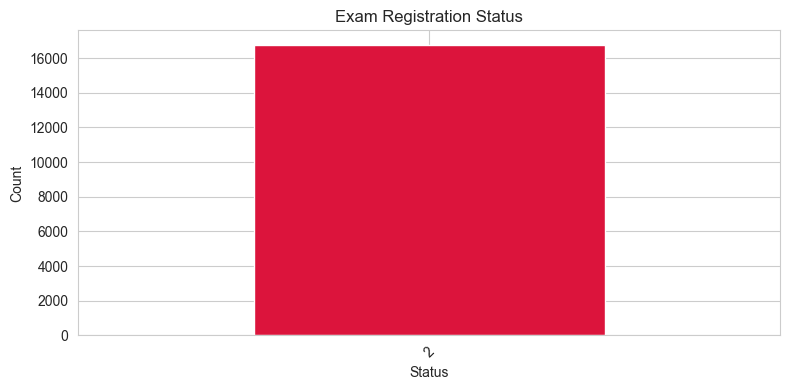

In [55]:
# 8.3 EDA - Visualizations
if 'status' in df_exam_reg.columns:
    plt.figure(figsize=(8, 4))
    df_exam_reg['status'].value_counts().plot(kind='bar', color='crimson')
    plt.title('Exam Registration Status')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [57]:
# 8.4 Preprocessing
print("🔧 PREPROCESSING EXAM REGISTRATIONS...")

# Convert Dates
date_cols = ['created_at', 'updated_at', 'deadline_at', 'retake_limit_at', 'exam_finished_at', 'deleted_at']
for c in date_cols:
    if c in df_exam_reg.columns:
        df_exam_reg[c] = pd.to_datetime(df_exam_reg[c], errors='coerce')
print(f"   Converted {len([c for c in date_cols if c in df_exam_reg.columns])} date columns")

# Keep all columns as needed
df_exam_reg_clean = df_exam_reg.copy()

print(f"\n✅ Cleaned shape: {df_exam_reg_clean.shape}")
print(f"   Retained columns: {list(df_exam_reg_clean.columns)}")

🔧 PREPROCESSING EXAM REGISTRATIONS...
   Converted 6 date columns

✅ Cleaned shape: (16759, 11)
   Retained columns: ['id', 'exam_module_id', 'tutorial_id', 'examinees_id', 'status', 'created_at', 'updated_at', 'deadline_at', 'retake_limit_at', 'exam_finished_at', 'deleted_at']


In [58]:
df_exam_reg_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16759 entries, 0 to 16758
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                16759 non-null  int64         
 1   exam_module_id    16759 non-null  int64         
 2   tutorial_id       16759 non-null  int64         
 3   examinees_id      16759 non-null  int64         
 4   status            16759 non-null  int64         
 5   created_at        16759 non-null  datetime64[ns]
 6   updated_at        16759 non-null  datetime64[ns]
 7   deadline_at       16759 non-null  datetime64[ns]
 8   retake_limit_at   16759 non-null  datetime64[ns]
 9   exam_finished_at  16759 non-null  datetime64[ns]
 10  deleted_at        9028 non-null   datetime64[ns]
dtypes: datetime64[ns](6), int64(5)
memory usage: 1.4 MB


In [59]:
# 8.5 Save
output_path = os.path.join(INTERIM_DIR, 'exam_registrations_clean.csv')
df_exam_reg_clean.to_csv(output_path, index=False)
print(f"💾 Saved: {output_path}")

💾 Saved: ../data/interim\exam_registrations_clean.csv
